In [287]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, chi2_contingency, chi2
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler, LabelEncoder
import time
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler, TomekLinks, OneSidedSelection
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [288]:
data = pd.read_csv('data/Financial-Data.csv')
data.head()

,Entry_id,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,...,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
0,7629673,40,bi-weekly,1,3135,0,3,3,6,2,...,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1
1,3560428,61,weekly,0,3180,0,6,3,2,7,...,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9,0
2,6934997,23,weekly,0,1540,6,0,0,7,1,...,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7,0
3,5682812,40,bi-weekly,0,5230,0,6,1,2,7,...,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8,1
4,5335819,33,semi-monthly,0,3590,0,5,2,2,8,...,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0


<font size="4">Drop unnecessary column: Entry_id</font>

In [289]:
data = data.drop(columns=['Entry_id'])

In [290]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17908 entries, 0 to 17907
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   17908 non-null  int64  
 1   pay_schedule          17908 non-null  object 
 2   home_owner            17908 non-null  int64  
 3   income                17908 non-null  int64  
 4   months_employed       17908 non-null  int64  
 5   years_employed        17908 non-null  int64  
 6   current_address_year  17908 non-null  int64  
 7   personal_account_m    17908 non-null  int64  
 8   personal_account_y    17908 non-null  int64  
 9   has_debt              17908 non-null  int64  
 10  amount_requested      17908 non-null  int64  
 11  risk_score            17908 non-null  int64  
 12  risk_score_2          17908 non-null  float64
 13  risk_score_3          17908 non-null  float64
 14  risk_score_4          17908 non-null  float64
 15  risk_score_5       

In [291]:
data.isnull().sum()

age                     0
pay_schedule            0
home_owner              0
income                  0
months_employed         0
years_employed          0
current_address_year    0
personal_account_m      0
personal_account_y      0
has_debt                0
amount_requested        0
risk_score              0
risk_score_2            0
risk_score_3            0
risk_score_4            0
risk_score_5            0
ext_quality_score       0
ext_quality_score_2     0
inquiries_last_month    0
e_signed                0
dtype: int64

<font size="4">There are no null values</font>

In [292]:
print('data shape before drop duplicated values:', data.shape)
data = data.drop_duplicates()
print('data shape after drop duplicated values:', data.shape)

data shape before drop duplicated values: (17908, 20)
data shape after drop duplicated values: (17908, 20)


<font size="4">There are no duplicated values</font>

# EDA

In [293]:
data.head()

,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
0,40,bi-weekly,1,3135,0,3,3,6,2,1,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1
1,61,weekly,0,3180,0,6,3,2,7,1,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9,0
2,23,weekly,0,1540,6,0,0,7,1,1,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7,0
3,40,bi-weekly,0,5230,0,6,1,2,7,1,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8,1
4,33,semi-monthly,0,3590,0,5,2,2,8,1,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0


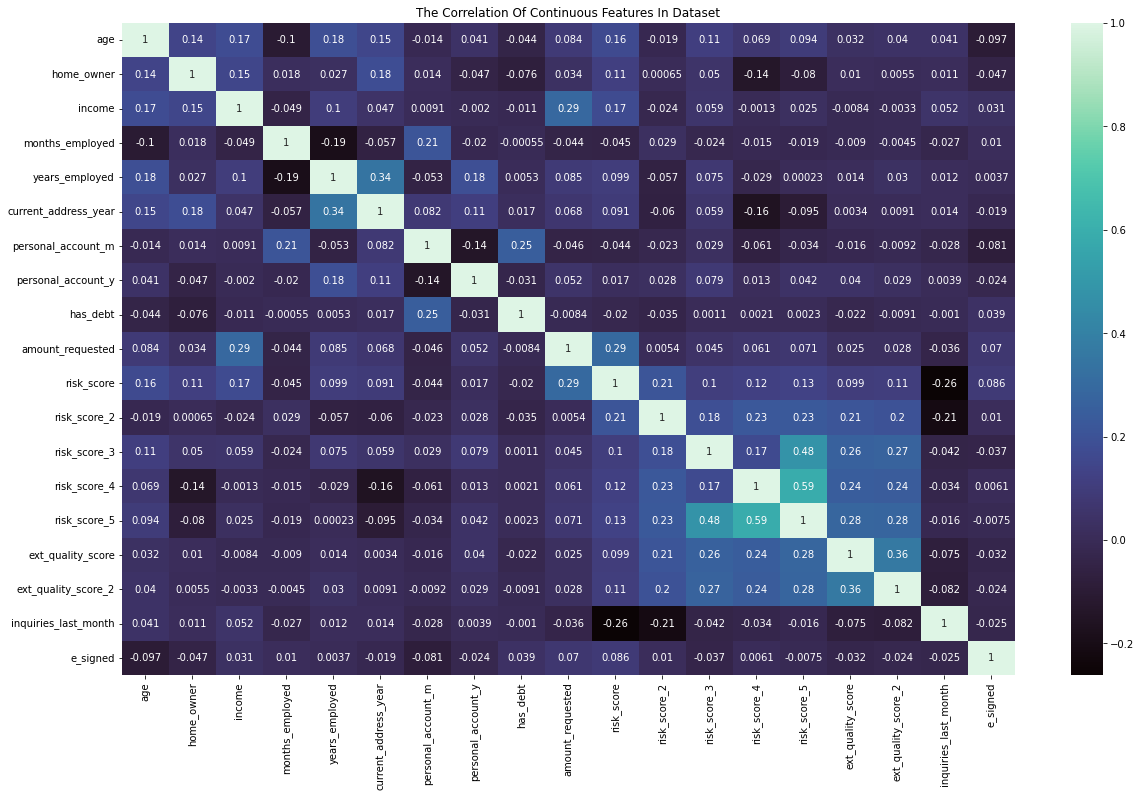

In [294]:
plt.figure(figsize=(20,12))
sns.heatmap(data=data.corr(), annot=True, cmap='mako')
plt.title('The Correlation Of Continuous Features In Dataset')
plt.show()

<font size="4">As the chart shows</font>

<font size="4">All the features seem to have no correlation</font>

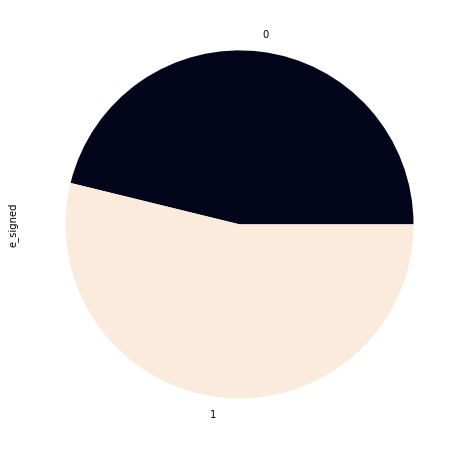

e_signed
0    8269
1    9639
Name: e_signed, dtype: int64

In [295]:
plt.figure(figsize=(8,8))
data.groupby('e_signed')['e_signed'].count().plot(kind='pie', cmap='rocket')
plt.show()
display(data.groupby('e_signed')['e_signed'].count())

<font size="4">Dataset is not much imbalanced. Most of inferential analytics are assured</font>

## Categorical Features Analysis

In [296]:
lst_cate = ['pay_schedule', 'home_owner', 'has_debt']

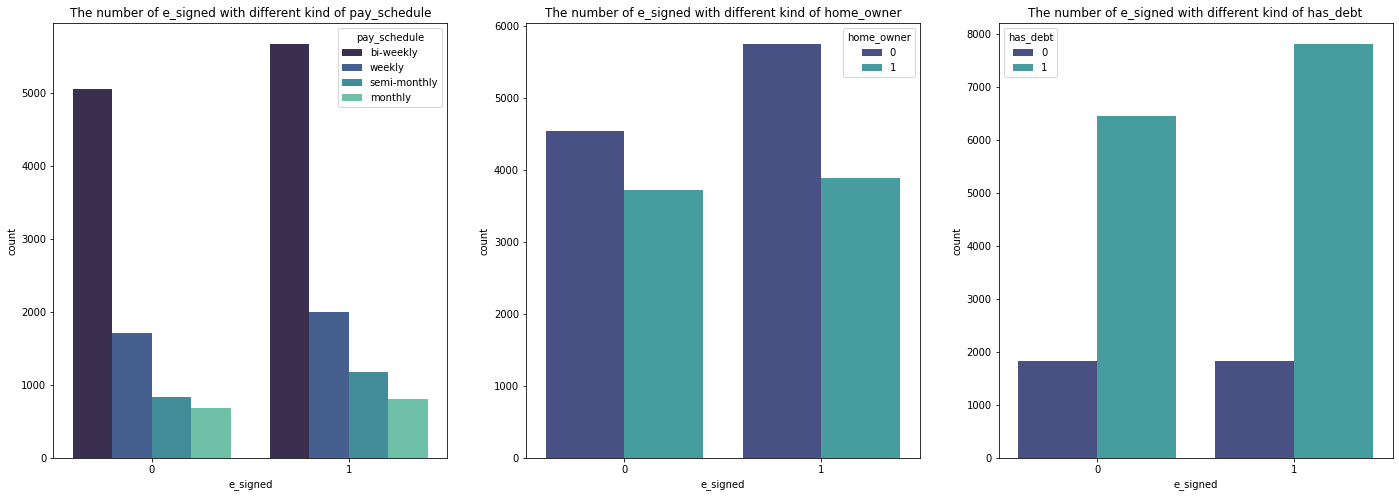

In [297]:
idx = 0
fig, axs = plt.subplots(1, 3, figsize=(24,8))
for i in range(3):
    sns.countplot(ax=axs[i], data=data, x='e_signed', hue=lst_cate[idx], palette='mako')
    axs[i].set_title('The number of e_signed with different kind of ' + lst_cate[idx])
    idx += 1

<font size="4">From the graphs show that</font>

<font size="4">Most of people choose to pay bi-weekly</font>

<font size="4">People who have home are willingly complete e-signing process</font>

<font size="4">The number of people who have debt is remarkable higher than people who are not in e-signing process</font>

* #------------------------------------------Chi Square Test-------------------------------------------------------#

- H0: lst_0 and lst_1 are DEPENDENT
- Ha: lst0 and lst_1 are INDEPENDENT

* #-------------------------------------------------------------------------------------------------------------------#

In [298]:
alpha = .05
for i in lst_cate:
    table = pd.crosstab(data[i], data['e_signed'])
    stat, p, dof, expected = chi2_contingency(table)
#--------------------------------------------------------------------------------
    print(f'p-value = {p:.2f}, alpha = {alpha:.2f}')
    if (p < alpha):
        print('p < alpha => reject H0 => ', i, 'and e_signed are DEPENDENT')
    else:
        print('p > alpha => failed to reject H0 =>', i, 'and e_signed are INDEPENDENT')
    print('\n')

p-value = 0.00, alpha = 0.05
p < alpha => reject H0 =>  pay_schedule and e_signed are DEPENDENT


p-value = 0.00, alpha = 0.05
p < alpha => reject H0 =>  home_owner and e_signed are DEPENDENT


p-value = 0.00, alpha = 0.05
p < alpha => reject H0 =>  has_debt and e_signed are DEPENDENT




<font size="4">From here, As the tests and charts illutrates that all categorical features affect to the decision of customer to e-signing of loan</font>

## Continuous Features Analysis

In [299]:
lst_num = []
for i in data.columns:
    if(i not in lst_cate and i != 'e_signed'):
        lst_num.append(i)

In [300]:
lst_num

['age',
 'income',
 'months_employed',
 'years_employed',
 'current_address_year',
 'personal_account_m',
 'personal_account_y',
 'amount_requested',
 'risk_score',
 'risk_score_2',
 'risk_score_3',
 'risk_score_4',
 'risk_score_5',
 'ext_quality_score',
 'ext_quality_score_2',
 'inquiries_last_month']

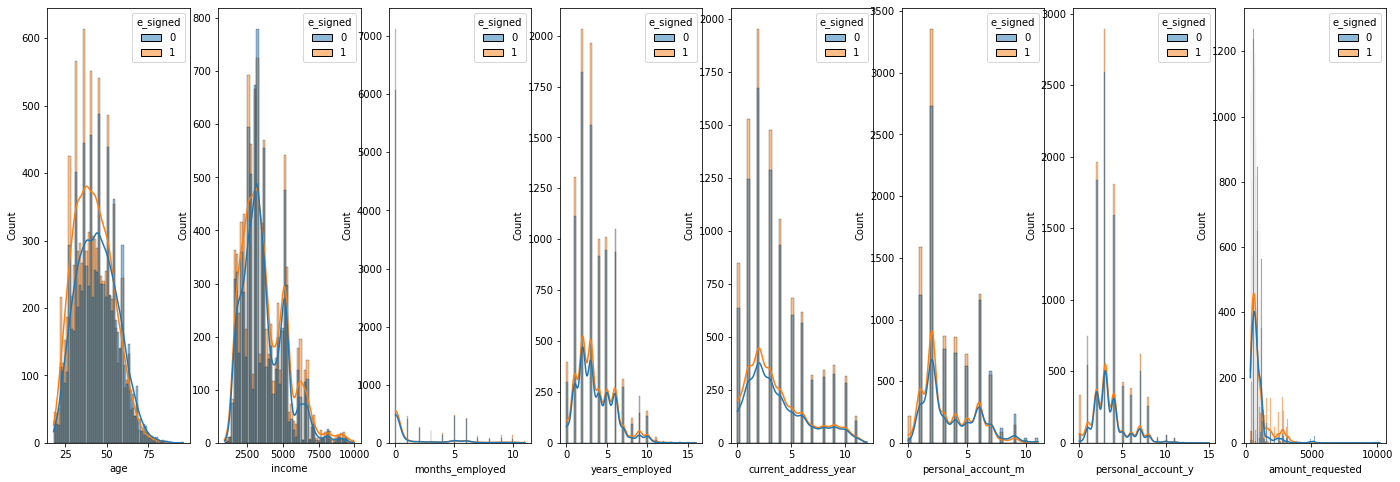

In [301]:
idx = 0
fig, axs = plt.subplots(1, 8, figsize=(24,8))
for i in range(8):
    sns.histplot(ax=axs[i], data=data, x=lst_num[idx], hue='e_signed', kde=True)
    idx += 1

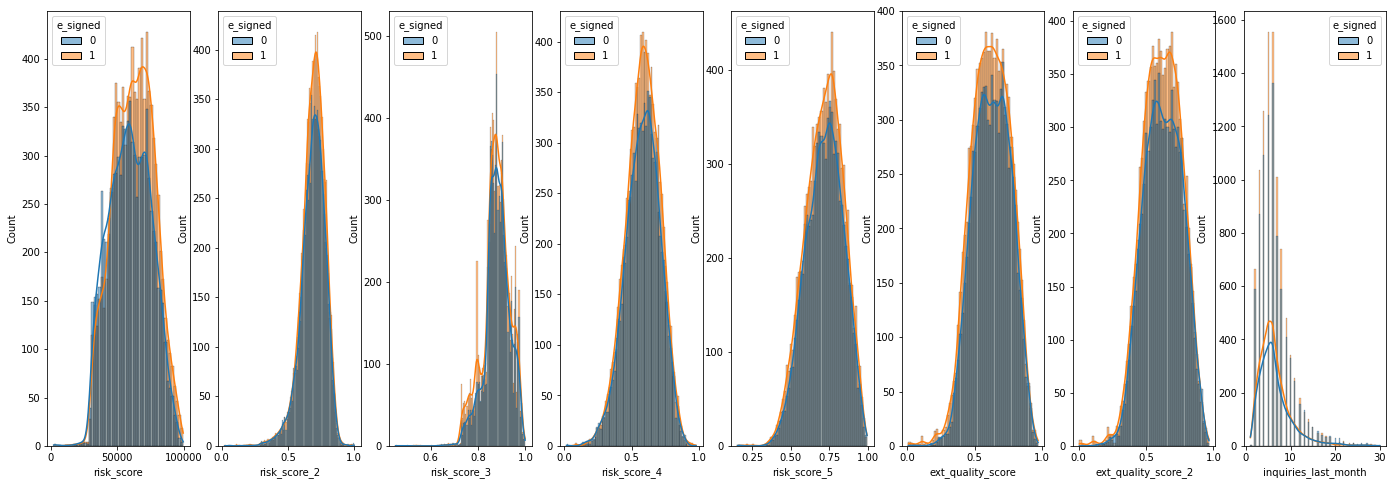

In [302]:
fig, axs = plt.subplots(1, 8, figsize=(24,8))
for i in range(8):
    sns.histplot(ax=axs[i], data=data, x=lst_num[idx], hue='e_signed', kde=True)
    idx += 1

<font size="4">Most of features seem to be overlapped, so it is hard to have any conclusion or understanding about the dataset. I use the inferential analytics for a better view</font>

* #------------------------------------------Welch's t-test-------------------------------------------------------#

- H0: There are differences between lst_0 and lst_1 aka mean(lst_0) == mean(lst_1)
- Ha: There are NO differences between lst0 and lst_1 aka mean(lst_0) != mean(lst_1)

* #-------------------------------------------------------------------------------------------------------------------#

In [303]:
alpha = .05
for i in lst_num:
    lst_0 = data[i].loc[data['e_signed'] == 0]
    lst_1 = data[i].loc[data['e_signed'] == 1]
    t, p = ttest_ind(lst_0, lst_1, equal_var = False)
#--------------------------------------------------------------------------------
    print(f'p-value = {p:.2f}, alpha = {alpha:.2f}')
    if (p < alpha):
        print('p < alpha => reject H0 => there are differences between', i, 'and e_signed')
    else:
        print('p > alpha => FAILED to reject H0 => there are NO differences between', i, 'and _signed')
    print('\n')

p-value = 0.00, alpha = 0.05
p < alpha => reject H0 => there are differences between age and e_signed


p-value = 0.00, alpha = 0.05
p < alpha => reject H0 => there are differences between income and e_signed


p-value = 0.17, alpha = 0.05
p > alpha => FAILED to reject H0 => there are NO differences between months_employed and _signed


p-value = 0.62, alpha = 0.05
p > alpha => FAILED to reject H0 => there are NO differences between years_employed and _signed


p-value = 0.01, alpha = 0.05
p < alpha => reject H0 => there are differences between current_address_year and e_signed


p-value = 0.00, alpha = 0.05
p < alpha => reject H0 => there are differences between personal_account_m and e_signed


p-value = 0.00, alpha = 0.05
p < alpha => reject H0 => there are differences between personal_account_y and e_signed


p-value = 0.00, alpha = 0.05
p < alpha => reject H0 => there are differences between amount_requested and e_signed


p-value = 0.00, alpha = 0.05
p < alpha => reject H0 => the

<font size="4">From the tests report that all features affect to the e_signed except for months_employed, years_employed, risk_score_2, risk_score_4, risk_score_5</font>

<font size="4">I will remove these features from the dataset</font>

In [304]:
data = data.drop(columns=['months_employed', 'years_employed', 'risk_score_2', 
                          'risk_score_4', 'risk_score_5'])
data.head()

,age,pay_schedule,home_owner,income,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,risk_score_3,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
0,40,bi-weekly,1,3135,3,6,2,1,550,36200,0.903517,0.580918,0.380918,10,1
1,61,weekly,0,3180,3,2,7,1,600,30150,0.881027,0.730720,0.630720,9,0
2,23,weekly,0,1540,0,7,1,1,450,34550,0.766554,0.531712,0.531712,7,0
3,40,bi-weekly,0,5230,1,2,7,1,700,42150,0.960832,0.792552,0.592552,8,1
4,33,semi-monthly,0,3590,2,2,8,1,1100,53850,0.857560,0.744634,0.744634,12,0


# Model - Classification

In [305]:
X = data.drop(columns=['e_signed'])
y = data['e_signed']

In [306]:
label_encoder = LabelEncoder()
X['pay_schedule'] = label_encoder.fit_transform(X['pay_schedule'])

In [307]:
ord_encoder = OrdinalEncoder()
X = ord_encoder.fit_transform(X)

In [308]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [309]:
label_yes_before = y_train.where(y_train == 1).count()
label_no_before = y_train.where(y_train == 0).count()
print('label yes before:', label_yes_before)
print('label no before:', label_no_before)

label yes before: 6744
label no before: 5791


In [310]:
ros = RandomOverSampler()
X_train, y_train = ros.fit_resample(X_train, y_train)

In [311]:
label_yes_after = y_train.where(y_train == 1).count()
label_no_after = y_train.where(y_train == 0).count()
print('label yes after:', label_yes_after)
print('label no after:', label_no_after)

label yes after: 6744
label no after: 6744


In [312]:
mm_scaler = MinMaxScaler()
X_train = mm_scaler.fit_transform(X_train)
X_test = mm_scaler.transform(X_test)

In [313]:
models= [LogisticRegression(), GaussianNB(), KNeighborsClassifier(n_neighbors=11), 
         RandomForestClassifier(), DecisionTreeClassifier(), XGBClassifier(), SVC()]
scores= []
test_score = []
train_times = []
names= []

In [314]:
for model in models:
    start= time.time()
    scores.append(cross_val_score(model, X_train, y_train, scoring= 'accuracy', cv= 10).mean())
    end = time.time()
    train_times.append(end-start)
    names.append(model.__class__.__name__)

df= pd.DataFrame(scores, columns=['Score'], index= range(len(models)))
df.insert(1, 'Time', pd.Series(train_times))
df.insert(0, 'Model', pd.Series(names))
df

,Model,Score,Time
0,LogisticRegression,0.575623,0.222487
1,GaussianNB,0.575771,0.090796
2,KNeighborsClassifier,0.578372,2.745018
3,RandomForestClassifier,0.673352,94.577506
4,DecisionTreeClassifier,0.628723,7.182969
5,XGBClassifier,0.659927,4.066945
6,SVC,0.604020,86.531053


In [315]:
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    test_score.append(score)    
    cm = classification_report(y_test, y_pred)
    print(model.__class__.__name__)
    print(cm, '\n')
df['Test_Score'] = test_score
df

LogisticRegression
              precision    recall  f1-score   support

           0       0.54      0.58      0.56      2478
           1       0.61      0.58      0.59      2895

    accuracy                           0.58      5373
   macro avg       0.58      0.58      0.57      5373
weighted avg       0.58      0.58      0.58      5373
 

GaussianNB
              precision    recall  f1-score   support

           0       0.54      0.58      0.56      2478
           1       0.62      0.58      0.59      2895

    accuracy                           0.58      5373
   macro avg       0.58      0.58      0.58      5373
weighted avg       0.58      0.58      0.58      5373
 

KNeighborsClassifier
              precision    recall  f1-score   support

           0       0.53      0.55      0.54      2478
           1       0.60      0.59      0.60      2895

    accuracy                           0.57      5373
   macro avg       0.57      0.57      0.57      5373
weighted avg       

,Model,Score,Time,Test_Score
0,LogisticRegression,0.575623,0.222487,0.575656
1,GaussianNB,0.575771,0.090796,0.577703
2,KNeighborsClassifier,0.578372,2.745018,0.571562
3,RandomForestClassifier,0.673352,94.577506,0.638005
4,DecisionTreeClassifier,0.628723,7.182969,0.563000
5,XGBClassifier,0.659927,4.066945,0.638563
6,SVC,0.604020,86.531053,0.610832


<font size="4">From the table XGBClassifier is the model that has the best performance not only accuracy score but only both precision and recall score </font>

## Stacking Model

<font size="4">I will perform the stacking model to see if it can improves the performance</font>

<font size="4">Base on the performance report abow, I chose the three fastest models: Logistic Regression, GaussianNB and KneighborsClassifer as the input model and meta model is DecisionTreeClassifier which is the best performance model</font>

In [316]:
lr_model = LogisticRegression()
gnb_model = GaussianNB()
knn_model = KNeighborsClassifier(n_neighbors=11)

In [317]:
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
#---------------------------------------
gnb_model.fit(X_train, y_train)
y_pred_gnb = gnb_model.predict(X_test)
#---------------------------------------
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

In [318]:
df_meta = pd.DataFrame()
df_meta['data_lr_0'] = y_pred_lr
#---------------------------------------
df_meta['data_gnb_0'] = y_pred_gnb
#---------------------------------------
df_meta['data_knn_0'] = y_pred_knn
#---------------------------------------
df_meta['data_test'] = y_test.reset_index().drop(columns=['index'])

,data_lr_0,data_gnb_0,data_knn_0,data_test
0,1,1,1,1
1,0,1,1,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1


In [319]:
X_ = df_meta.drop(columns=['data_test'])
y_ = df_meta['data_test']

In [320]:
X_train_, X_test_, y_train_, y_test_ = train_test_split(X_, y_, test_size=0.3)

In [321]:
meta_model = XGBClassifier()
meta_model.fit(X_train_, y_train_)
y_pred_meta_ = meta_model.predict(X_test_)
print('accuracy:', accuracy_score(y_test_, y_pred_meta_))

accuracy: 0.5725806451612904


In [322]:
cm = classification_report(y_test_, y_pred_meta_)
print(cm, '\n')

              precision    recall  f1-score   support

           0       0.52      0.65      0.58       727
           1       0.64      0.51      0.57       885

    accuracy                           0.57      1612
   macro avg       0.58      0.58      0.57      1612
weighted avg       0.59      0.57      0.57      1612
 



<font size="4">Stacking Model doesn't obtain the better score. So XGBClassifier still the best model so far</font>